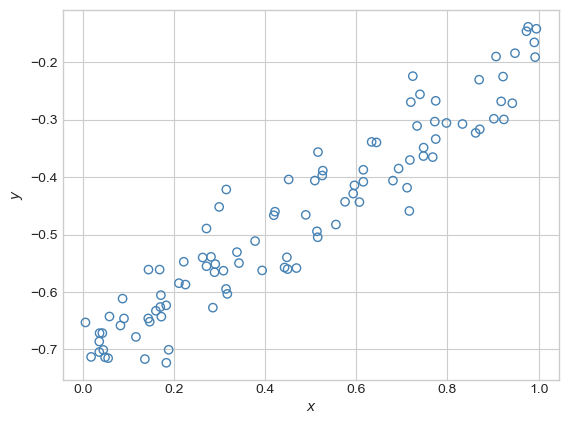

In [1]:
import torch
from matplotlib import pyplot as plt 
plt.style.use('seaborn-v0_8-whitegrid')

def regression_data(n = 100, w = torch.Tensor([-0.7, 0.5]), x_max = 1):

    x = torch.rand(n)*x_max
    y = x*w[1] + w[0] + 0.05*torch.randn(n)
    return x, y

x, y = regression_data()

plt.scatter(x, y, facecolors = "none", edgecolors = "steelblue")
labs = plt.gca().set(xlabel = r"$x$", ylabel = r"$y$")

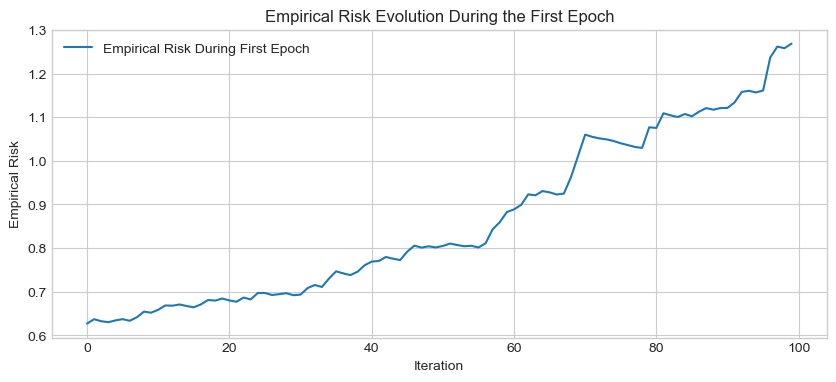

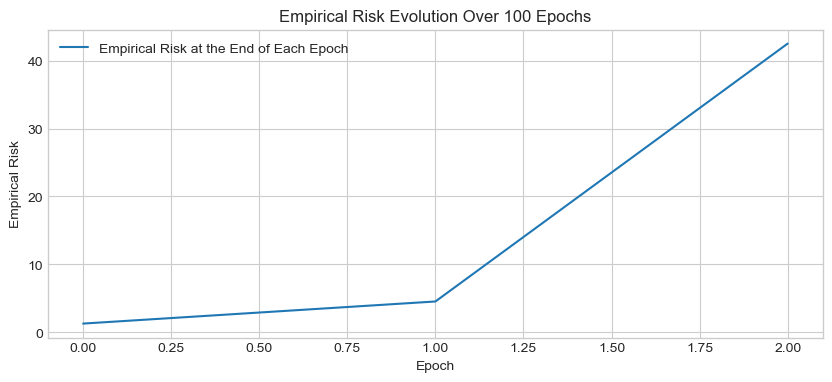

In [2]:
# Empirical risk calculation function
def empirical_risk(w0, w1, x, y):
    return ((y - w1 * x - w0)**2).mean()

# Weight update function for SGD
def update_weights(w0, w1, x, y, alpha, t, idx):
    i = idx
    err = y[i] - w1 * x[i] - w0
    w0 -= (2 * alpha / t) * w0 * err
    w1 -= (2 * alpha / t) * w1 * err * x[i]
    return w0, w1

# Stochastic Gradient Descent function for regression
def sgd_regression(x, y, alpha, t_max, plot_single_epoch=False):
    w0, w1 = torch.randn(1), torch.randn(1)  # Initial random weights
    risk_over_time = []

    for t in range(1, t_max + 1):
        perm = torch.randperm(x.size(0))
        risks = []

        for i in perm:
            w0, w1 = update_weights(w0, w1, x, y, alpha, t, i)
            if plot_single_epoch and t == 1:
                current_risk = empirical_risk(w0, w1, x, y)
                risks.append(current_risk)

        end_epoch_risk = empirical_risk(w0, w1, x, y)
        risk_over_time.append(end_epoch_risk)

        if plot_single_epoch and t == 1:
            plt.figure(figsize=(10, 4))
            plt.plot(risks, label='Empirical Risk During First Epoch')
            plt.xlabel('Iteration')
            plt.ylabel('Empirical Risk')
            plt.title('Empirical Risk Evolution During the First Epoch')
            plt.legend()
            plt.show()

    return w0, w1, risk_over_time

# Parameters for SGD
alpha = 0.01
t_max = 100

# Generate data
x, y = regression_data()

# Run the SGD regression
final_w0, final_w1, risks = sgd_regression(x, y, alpha, t_max, plot_single_epoch=True)

# Plot the empirical risk over 100 epochs
plt.figure(figsize=(10, 4))
plt.plot(risks, label='Empirical Risk at the End of Each Epoch')
plt.xlabel('Epoch')
plt.ylabel('Empirical Risk')
plt.title('Empirical Risk Evolution Over 100 Epochs')
plt.legend()
plt.show()